<a href="https://colab.research.google.com/github/correamv/Data_Science/blob/main/Detec%C3%A7%C3%A3o_de_Fraude_em_Cart%C3%B5es_de_Cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Detecção de Fraudes em Cartões de Crédito

Neste artigo, iremos abordar o problema das fraudes em cartões de crédito, uma das principais preocupações das instituições financeiras como bancos e *fintechs*. Apenas no Brasil, cerca de 12,1 milhões de pessoas já foram vítimas de algum tipo de fraude financeira no último ano. Traduzindo em valores, os golpes financeiros ultrapassaram a cifra de R$ 1,8 bilhão de prejuízo por ano para os últimos 12 meses.

<p align=center>
<img src="https://images.unsplash.com/photo-1592772874383-d08932d29db7?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=699&q=80" width="60%"></p>

Dentra essas fraudes, aquelas envolvendo cartões de crédito são de grande relevância uma vez que a sua não-detecção acaretará em prejuízos consideráveis, tanto para o consumidor quanto para a instituição financeira.

Um outro fator a ser considerado é a quantidade de falsos positivos, ou seja, aquelas vezes em que você tentou fazer uma compra e teve seu cartão bloqueado preventivamente - o que provavelmente gerou estresse e constrangimento.

Por todos esses motivos, o investimento na área de detecção de fraudes por meio de Inteligência Artificial vem crescendo a cada ano, representando uma grande oportunidade em *Data Science*. 

Dispondo de grandes volumes de dados como base histórica, um algoritmo de machine learning apenas um pouco melhor que os anteriores já representa uma economia de milhões de Reais. E esse é o desafio, aprimorar cada vez mais o uso de algoritmos visando inibir ou evitar transações fraudulentas.

## Importando os Dados

Os dados que usaremos neste projeto foram disponibilizados por algumas empresas européias de cartão de crédito. O *dataset* representa as operações financeiras que aconteceram no período de dois dias, onde foram classificadas 492 fraudes em meio a quase 290 mil transações.

Um detalhe interessante é que as *features* são todas numéricas, e foram descaracterizadas (por problemas ligados à privacidade e segurança). Assim, os nomes das colunas são representados por $[V1, V2, V3 \dots, V28]$ 

<p align=center>
<img src="https://images.unsplash.com/photo-1620714223084-8fcacc6dfd8d?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=1051&q=80" width="50%"></p>

[Na página original dos dados](https://www.kaggle.com/mlg-ulb/creditcardfraud), também é informado que as variáveis passaram por uma transformação conhecida como Análise de Componentes Principais (*Principal Component Analysis* - PCA).

A PCA permite a redução da dimensionalidade enquanto mantém o maior número possível de informações. Para conseguir isso, o algoritmo encontra um conjunto novo de recursos - os chamados **componentes**.

Esses componentes são em número menor or igual às variáveis originais. No caso deste projeto, os componentes achados pela transformação da PCA são as próprias colunas $[V1, V2, V3 \dots, V28]$.

In [ ]:
# instalar a biblioteca scikit-plot
!pip install -q scikit-plot

In [ ]:
# importar os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt
import numpy as np

from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score



Para facilitar a aquisição dos dados, usarei um *link* com acesso direto ao `csv`. Com isso, basta importar o conjunto de dados usando o método `pd.read_csv()`.

In [ ]:
file_path = "https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1"

# importar os dados para um dataframe
df = pd.read_csv(file_path)

# dimensões do conjunto original
print("Dimensões do Conjunto Original: ", df.shape)

# criando o conjunto de teste
test = df.sample(frac=0.15, random_state=0)

# drop das linhas de teste
df = df.drop(test.index)

# verificando o conjunto
print("Dimensões do Conjunto de Teste: ", test.shape)
print("Dimensões do Conjunto de Treino: ", df.shape)

Dimensões do Conjunto Original:  (284807, 31)
Dimensões do Conjunto de Teste:  (42721, 31)
Dimensões do Conjunto de Treino:  (242086, 31)


Com os dados importados para dentro de uma estrutura *Dataframe* - e não havendo a necessidade de mais nenhum ajuste ou configuração nesta etapa, pode-se iniciar uma análise exploratória dos dados a fim de preparar um modelo de *Machine Learning*.


## Dicionário de Variáveis

Conforme mencionado acima, as features do dataset foram descaracterizadas e passaram por um processo de redução de dimensionalidade. Porém ainda temos três variáveis que precisam ser descritas:

* `Time` - Tempo em segundos que se passaram desde a primeira transação no dataset até esta transação.

* `Amount` - Valor monetário da transação

* `Class` - é a variável dependente e assume valor 1 para fraude confirmada e 0 para transações legítimas. 

## Análise Exploratória

<p align=center>
<img src="https://img.freepik.com/free-vector/magnifying-glass-background-design_1010-573.jpg?w=826&t=st=1680879834~exp=1680880434~hmac=f9c74ec33ca5b561f823a75ba8d3d4bd79ccaecf1761ac95fcf905a9ee56a0d4" width="50%"></p>


Nesta etapa iremos realizar a análise exploratória do dataset, com o intuito de conhecermos melhor os dados que estamos lidando. Para isso começaremos visualizando as 5 primeiras entradas usando a método `head()` e veremos o resumo estatístico do dataset, usando o método `describe()`.


In [ ]:
#visualizar as cinco primeiras entradas
df.head(5)
print("O dataset possui {} entradas.".format(df.shape[0]))

O dataset possui 242086 entradas.


In [ ]:
#resumo estatístico do dataset
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,...,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000
mean,94857.597379,0.001456,-0.000800,-0.001004,0.000647,-0.000986,-0.001196,-0.000033,-0.000416,-0.000725,...,-0.000015,0.000606,-0.000482,0.000199,0.000048,-0.000269,-0.000727,0.000065,88.612429,0.001727
std,47490.660832,1.956513,1.654883,1.514580,1.417228,1.366284,1.326879,1.223095,1.199718,1.099350,...,0.734189,0.726284,0.629651,0.605150,0.521574,0.482084,0.401490,0.327734,247.655020,0.041517
min,0.000000,-56.407510,-72.715728,-33.680984,-5.683171,-42.147898,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.822684,-10.295397,-2.604551,-22.565679,-11.710896,0.000000,0.000000
25%,54234.000000,-0.920406,-0.598659,-0.893374,-0.848236,-0.693615,-0.769025,-0.553805,-0.208857,-0.645058,...,-0.228492,-0.542962,-0.161941,-0.354494,-0.316853,-0.327387,-0.070744,-0.052903,5.662500,0.000000
50%,84747.000000,0.019230,0.064567,0.177607,-0.018959,-0.054544,-0.274310,0.040344,0.022160,-0.051370,...,-0.028987,0.007162,-0.011175,0.040764,0.017175,-0.052337,0.001131,0.011209,22.000000,0.000000
75%,139362.000000,1.316034,0.803174,1.026561,0.743691,0.611455,0.397688,0.570104,0.327186,0.597195,...,0.187064,0.529814,0.147358,0.439320,0.350795,0.241214,0.090776,0.078234,77.580000,0.000000
max,172792.000000,2.451888,22.057729,9.382558,16.875344,34.801666,23.917837,44.054461,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.022866,7.519589,3.517346,12.152401,33.847808,19656.530000,1.000000


Agora verificaremos como está a distribuição de valores ausentes no dataset, assim como a distribuição das variáveis `time` e `Amount` para as transações verdadeiras e as fraudulentas. Para isto faremos uso de visualizações como histogramas e gráficos do tipo *boxplot*. 

In [ ]:
#verificando o percentual de valores ausentes
round((df.isnull().sum() / df.shape[0]).sort_values(ascending=False),2)

Time      0.0
V16       0.0
Amount    0.0
V28       0.0
V27       0.0
V26       0.0
V25       0.0
V24       0.0
V23       0.0
V22       0.0
V21       0.0
V20       0.0
V19       0.0
V18       0.0
V17       0.0
V15       0.0
V1        0.0
V14       0.0
V13       0.0
V12       0.0
V11       0.0
V10       0.0
V9        0.0
V8        0.0
V7        0.0
V6        0.0
V5        0.0
V4        0.0
V3        0.0
V2        0.0
Class     0.0
dtype: float64

0    241668
1       418
Name: Class, dtype: int64

 As transações fraudulentas representam 0.173% das entradas do dataset. 



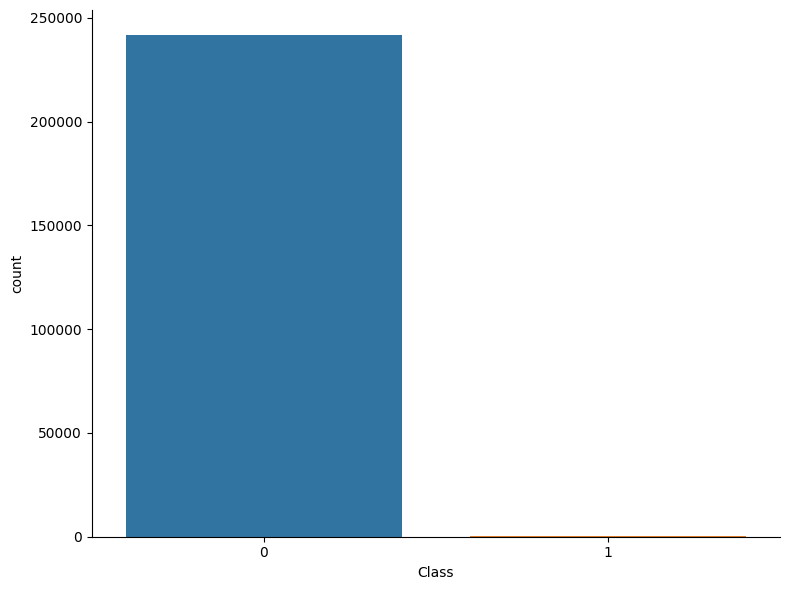

In [ ]:
print(df.Class.value_counts())
print("\n As transações fraudulentas representam {:.3f}% das entradas do dataset. \n".format( (df[df.Class == 1].shape[0] / df.shape[0]) * 100))

#verificando o balanceamento do dataset

#configurando a fonte
#plt.rcParams['font.family'] = 'Arial'

fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(x=df['Class'])

#removendo spines da direita e superior
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()

Podemos observar que o dataset não possui valores nulos, e que ele está altamente desbalanceado com relação a variável classe. Temos apenas 0,17% das transações como fraudulentas. 

Seguiremos a análise plotando os histogramas para as variáveis `time`e `amount`para cada classe(0 ou 1). Porém não foi possível observar alguma informação a partir apenas da distribuição de frequências abaixo.   

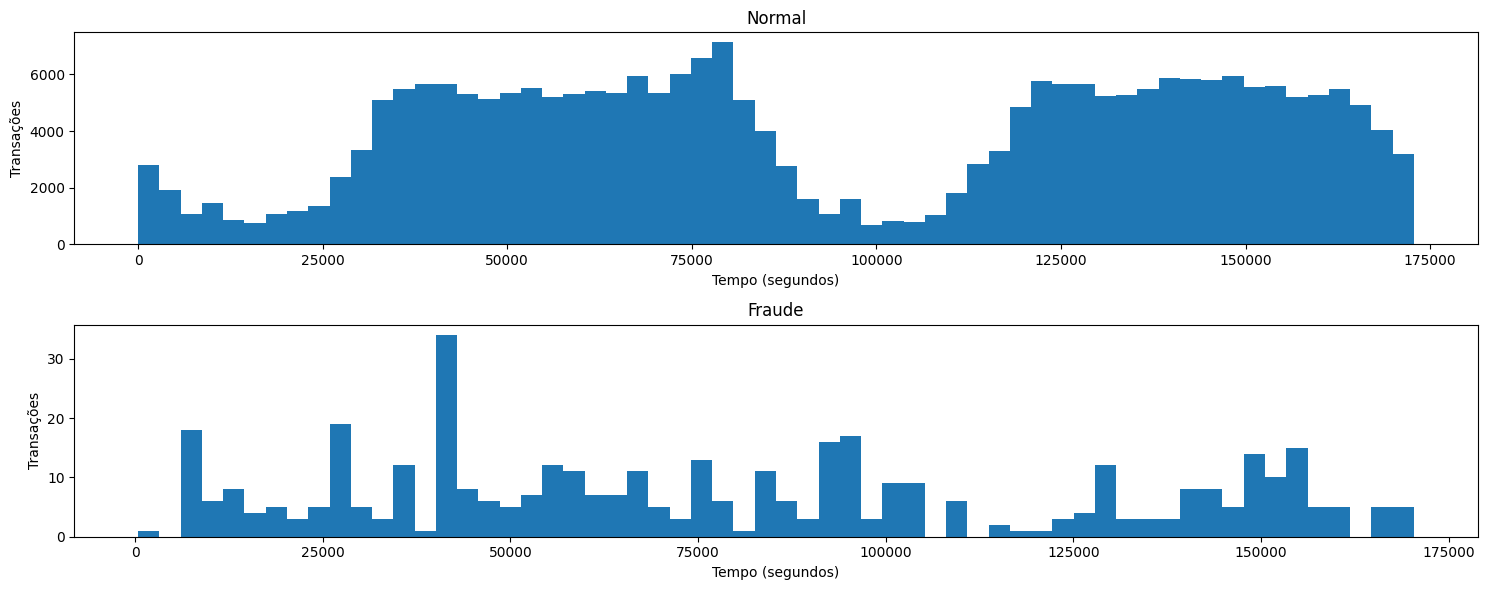

In [ ]:
#histograma para a variavel time
fig, ax = plt.subplots(figsize=(15,6), nrows=2, ncols=1)

num_bins = 60

ax[0].hist(df.Time[df.Class == 0], bins = num_bins)
ax[0].set_title('Normal')
ax[0].set_ylabel('Transações')
ax[0].set_xlabel('Tempo (segundos)')

ax[1].hist(df.Time[df.Class == 1], bins = num_bins)
ax[1].set_title('Fraude')
ax[1].set_ylabel('Transações')
ax[1].set_xlabel('Tempo (segundos)')


plt.tight_layout()

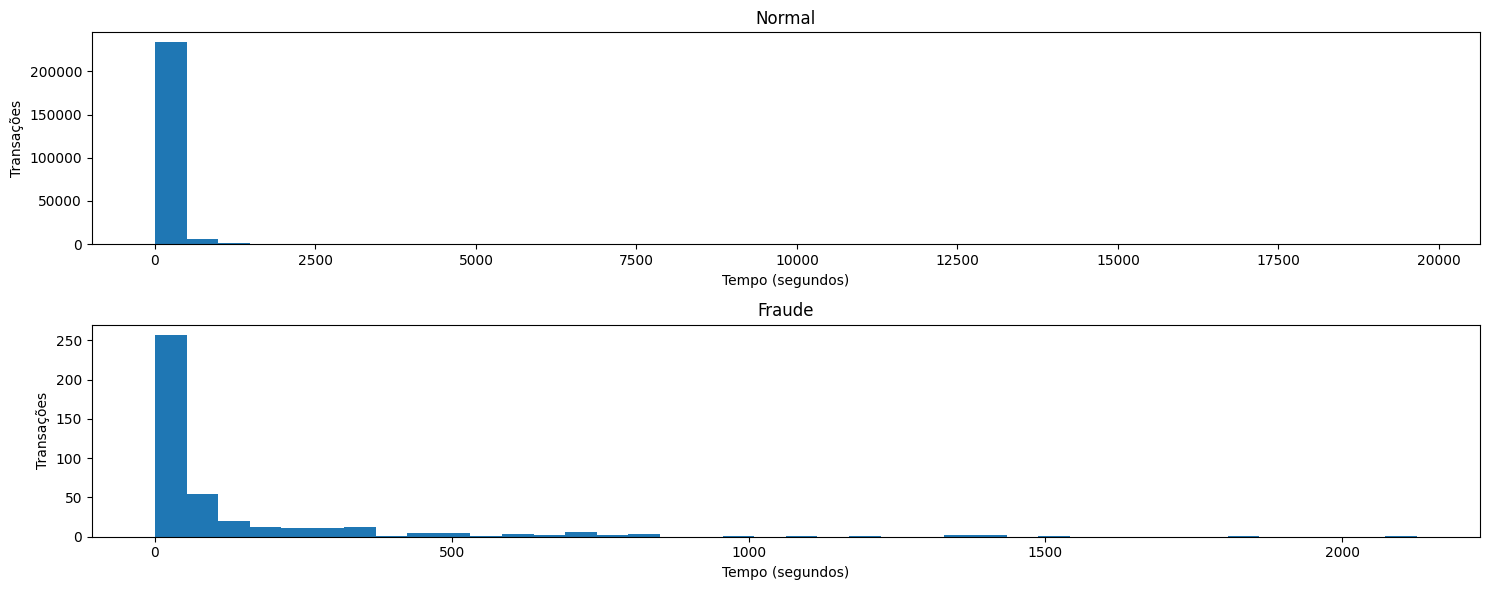

In [ ]:
#histograma para a variavel amount
fig, ax = plt.subplots(figsize=(15,6), nrows=2, ncols=1)

num_bins = 40

ax[0].hist(df.Amount[df.Class == 0], bins = num_bins)
ax[0].set_title('Normal')
ax[0].set_ylabel('Transações')
ax[0].set_xlabel('Tempo (segundos)')

ax[1].hist(df.Amount[df.Class == 1], bins = num_bins)
ax[1].set_title('Fraude')
ax[1].set_ylabel('Transações')
ax[1].set_xlabel('Tempo (segundos)')


plt.tight_layout()

A idéia por trás de visualizarmos a distribuição destas variáveis em cada classe, é para verificarmos qual o comportamento delas nos casos em que as transações são fraudulentas ou não. Isso nos ajudará no treinamento do modelo de machine learning.

Podemos ver através do boxplot abaixo, que para a feature `Amount`, temos uma diferença na distribuição para as duas classes. Isso ajudará no treinamento do modelo, mais a frente. 

Além disso é possível observar a presença de outliers nas variáveis. 


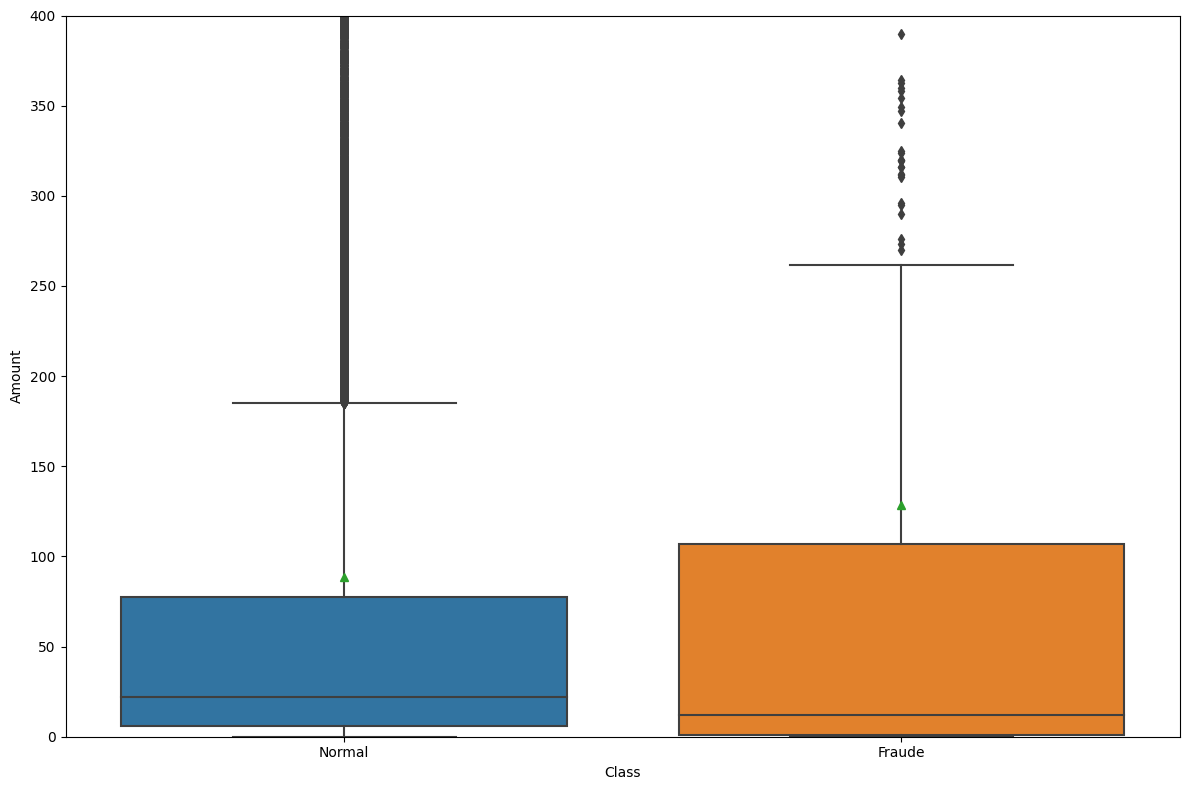

In [ ]:
fig, ax = plt.subplots(figsize=(12,8), sharex=True)

sns.boxplot(y=df.Amount, x=df.Class, showmeans=True, ax=ax,)
plt.xticks([0,1], ['Normal', 'Fraude'])
plt.ylim(0,400)

plt.tight_layout()

Para encerrar a parte exploratória dos dados, podemos plotar uma visualização muito interessante, que é o gráfico de densidade. 
Faremos isso com relação a ambas as classes e veremos se há alguma diferença na distribuição quando uma transação é fraldulenta. 
Observe que as  variáveis V3, V4, V10 e V11, são bem distintas.
Por outro lado, as variáveis V8, V13 e V15, são muito similares. 

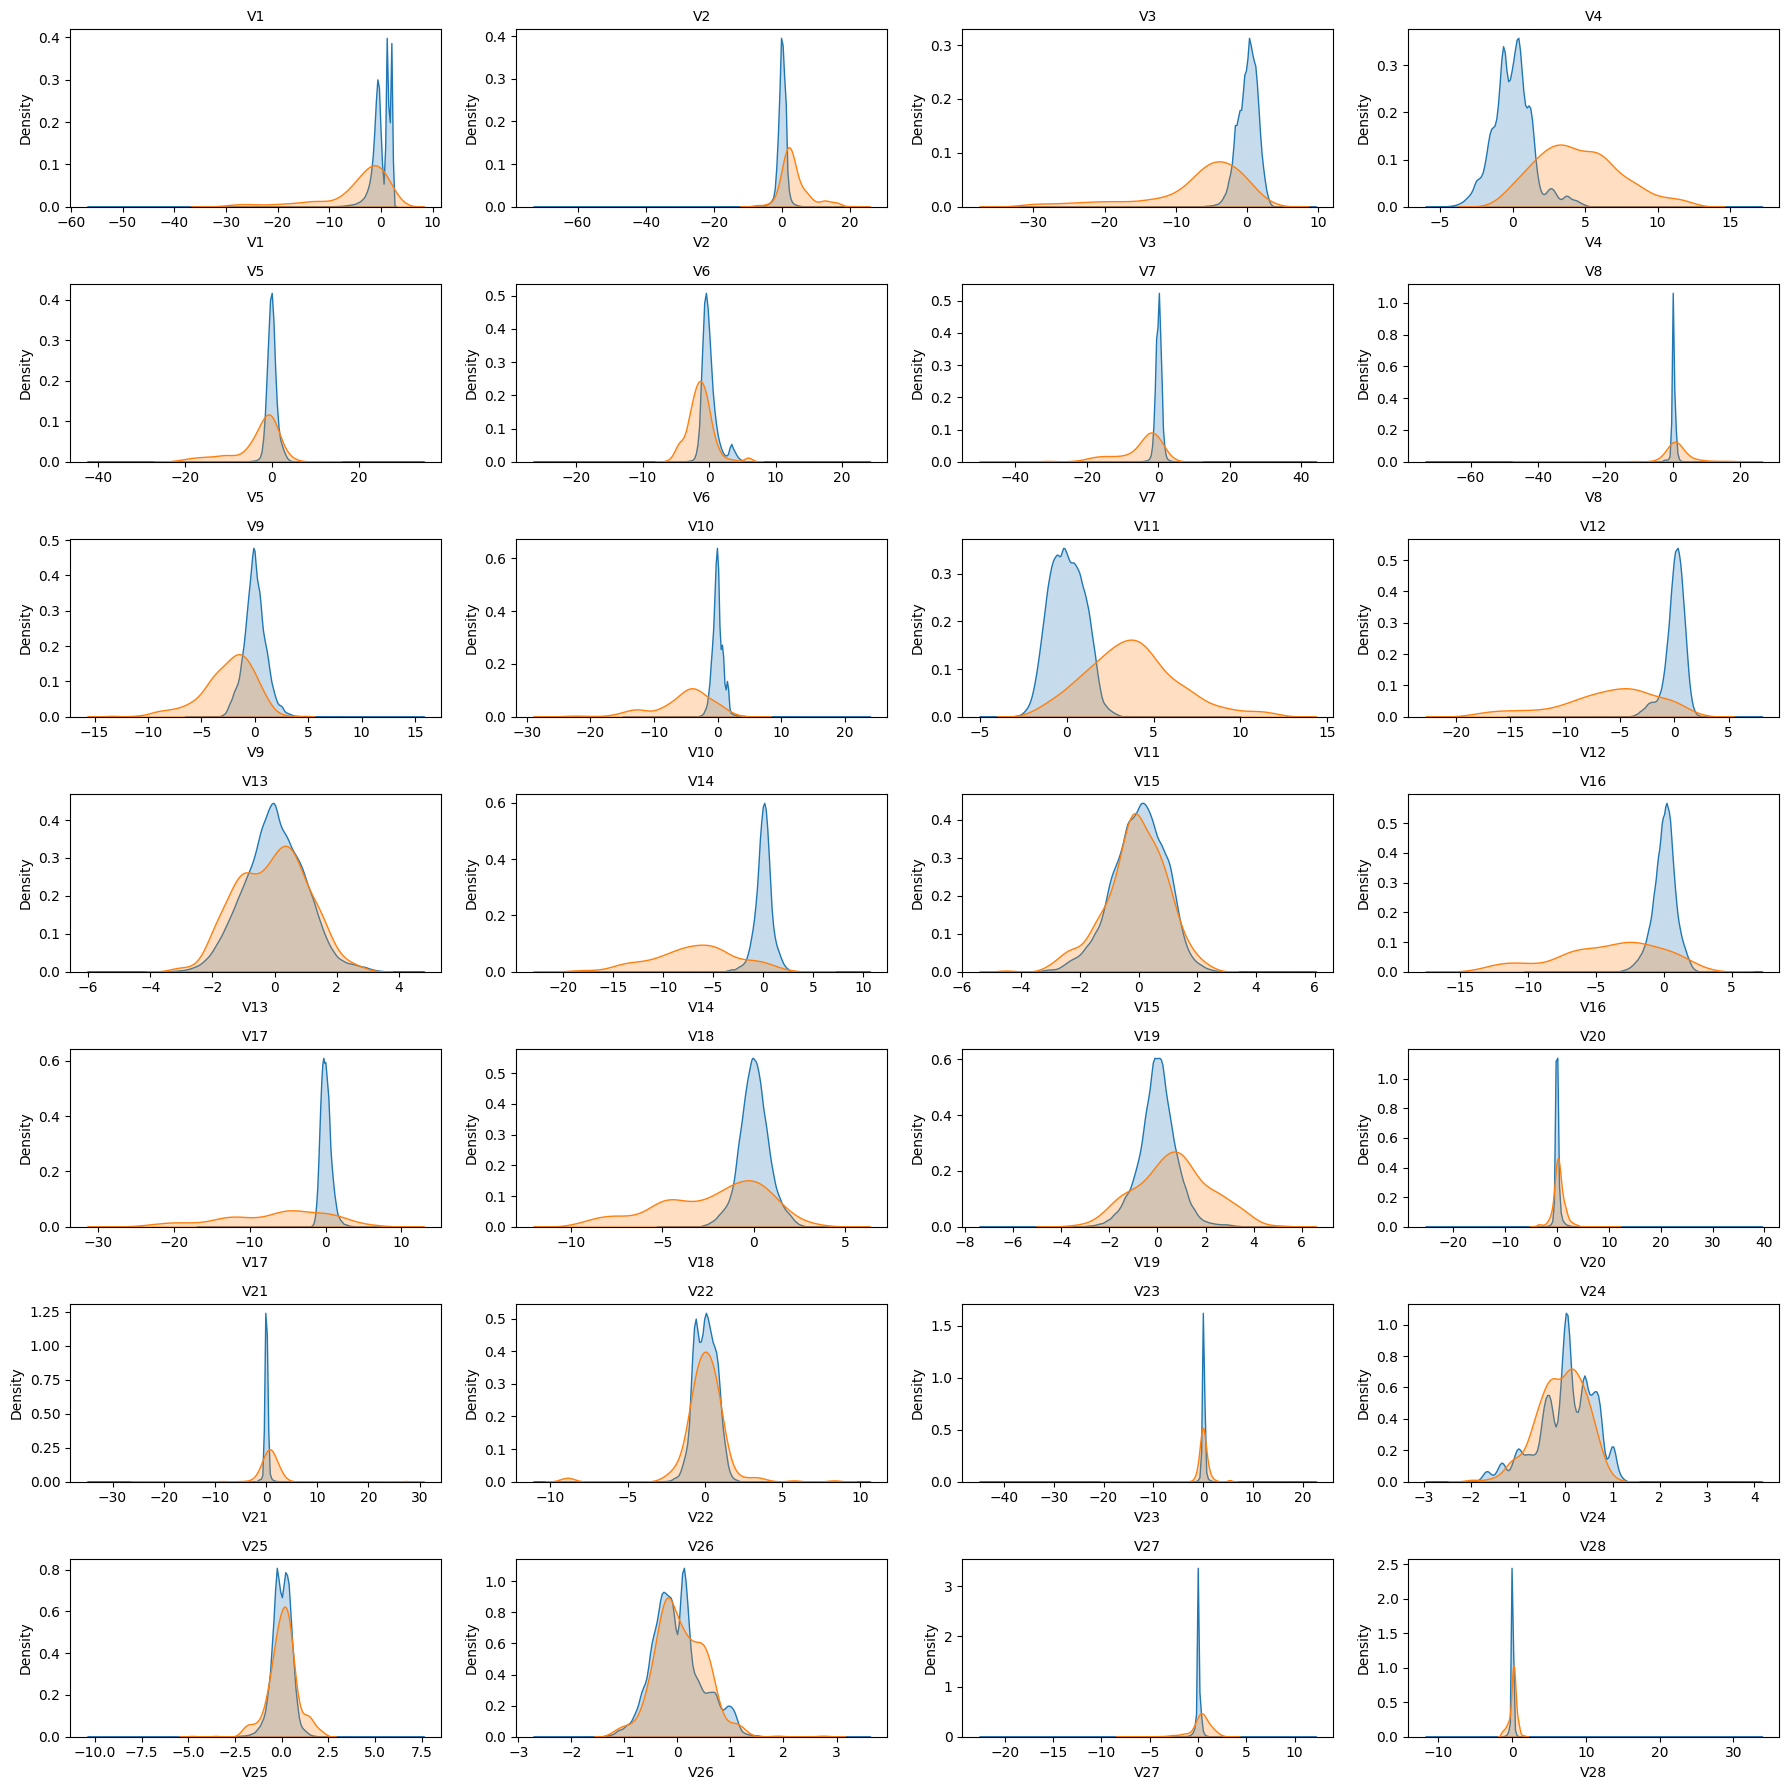

In [ ]:
column_names = df.drop(['Class', 'Amount', 'Time'], axis=1).columns
num_plots=len(column_names)
df_0 = df[df.Class == 0]
df_1 = df[df.Class == 1]
fig, ax = plt.subplots(figsize=(18,18), ncols=4, nrows=7)
fig.subplots_adjust(hspace=1, wspace=1)

idx = 0
for col in column_names:
    idx += 1
    plt.subplot(7, 4, idx)
    sns.kdeplot(df_0[col], label="Class 0", fill=True)
    sns.kdeplot(df_1[col], label="Class 1", fill=True)
    plt.title(col, fontsize=10)
plt.tight_layout()


####Resumo

* Dataset consiste de 284807 entradas.
* Não há valores ausentes.
* Os dados estão altamente desbalanceados, sendo apenas 0,17% de fraudes.
* Há uma diferença significativa em `Amount` para classes diferentes.
* Variáveis `Time` e `Amount` não estão normalizadas. 
* Variáveis V3, V4, V10 e V11 possuem uma distribuição bem distinta para casos fraudulentos.  



## Preparação dos Dados

<p align=center>
<img src="https://img.freepik.com/free-photo/high-view-laptop-black-shopping-card_23-2148670030.jpg?w=1380&t=st=1680879501~exp=1680880101~hmac=6f747e09a786d2107b44594d1fa9a774c17b97d0e7db9a03b854f9b16f1dbf94" width="50%"></p>


* Normalizar os dados que ainda não haviam sido pré-processados (`Time` e `Amount`)
* Dividir o conjunto de dados entre treino e validação
* Balancear o conjunto de dados


### Normalização dos dados

Continuando nosso projeto, será necessário normalizar agora as variáveis `Time` e `Amount`, assim como as outras colunas do dataset foram normalizadas. 

Para isto utilizarei a classe `StandardScaler` e `RobustScaler`. 


In [ ]:
# RobustScaler é menos suscetível a outliers

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['Scaled_Amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['Scaled_Time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))
df.drop(['Time', 'Amount'], axis=1, inplace=True)



In [ ]:
scaled_amount = df['Scaled_Amount']
scaled_time = df['Scaled_Time']

df.drop(['Scaled_Amount', 'Scaled_Time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

# Amount e Time estão normalizadas

df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.774533,-0.995524,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.268502,-0.995524,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.959294,-0.995513,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.411339,-0.995513,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.667292,-0.995501,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


#### Dividir entre conjuntos de treino e validação

Antes de iniciarmos o balanceamento do dataset, é necessário realizar a separação do mesmo em conjuntos de treino e de validação. Mas por quê?

Apesar de que iremos usar técnicas de UnderSampling ou OverSampling para o balanceamento dos dados, queremos que os testes do modelo de Machine Learning sejam feitos nos dados originais, não em dados de teste criados por estas técnicas. Desta forma é possível ter mais confiança nos resultados dos testes.

Para separar o dataset usaremos simplesmente a classe `train_test_split` com o argumento `stratify`, para garantir a proporcionalidade de classes.

In [ ]:
X = df.drop('Class', axis=1)
y = df['Class']

#dividir o dataset entre validação e teste

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=42, stratify=y, shuffle=True)

#verificando se a proporção das classes

print("A proporção de transações fraudulentas para treino e validação, respectivamente: \n")

print((y_train[y_train == 1].count() / y_train.shape[0]))
print((y_val[y_val == 1].count() / y_val.shape[0]))

A proporção de transações fraudulentas para treino e validação, respectivamente: 

0.001723910026216651
0.0017349063150589867


#### Balanceamento dos Dados

Neste etapa iremos proceder para o balanceamento dos dados. Para isso será utilizado o método de *Under Sampling*, que basicamente consiste em remover dados, priorizando a classe minoritária,  com o intuito de deixar o dataset mais balanceado e evitar o *overfitting*.

O risco deste método é tornar o modelo menos eficaz, tendo em vista que estamos diminuindo significativamente o tamanho do dataset. Neste caso reduziremos de 284.807 entradas, para apenas 984 entradas (492 fraudes + 492 verídicas). 


In [ ]:
#randomizar os dados antes de separa-los
n_fraudes = df[df.Class == 1].shape[0]
df = df.sample(frac=1) #embaralha os dados
df_fraude = df.loc[df.Class == 1]
df_legitimo = df.loc[df.Class == 0][:n_fraudes]

#concatenando o dataframe com somente fraudes e o dataframe com somente transações legítimas
df_normal = pd.concat([df_fraude, df_legitimo])

#randomizar as linhas do novo dataframe:
df_normal = df_normal.sample(frac=1, random_state=42)

x_rus = df_normal.drop('Class', axis=1)
y_rus = df_normal.Class

df_normal.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
96061,-0.283658,-0.225026,-0.235725,0.599569,1.561397,-0.337496,0.370555,-0.127352,0.591842,-0.184932,...,0.189697,-0.074288,-0.008847,-0.208386,-0.361489,-0.341562,1.114518,-0.123306,-0.131789,0
280067,-0.222616,0.993245,0.035873,0.887832,0.270074,-0.612571,0.513938,-0.983026,1.043440,-0.209569,...,-0.000963,-0.251229,-0.515550,0.067735,-0.075867,-0.475000,0.145839,0.252885,0.097544,0
64329,1.084437,-0.395111,-9.848776,7.365546,-12.898538,4.273323,-7.611991,-3.427045,-8.350808,6.863604,...,0.832398,0.931958,-0.874467,-0.192639,-0.035426,0.538665,-0.263934,1.134095,0.225973,1
237122,1.660514,0.756061,1.716421,-0.870501,-0.414463,0.619856,-0.932973,-0.460419,-0.470931,-0.042335,...,0.011960,0.269577,0.721919,0.006977,-0.064471,-0.166845,-0.218174,0.016952,-0.015631,0
6882,-0.290611,-0.892057,-4.617217,1.695694,-3.114372,4.328199,-1.873257,-0.989908,-4.577265,0.472216,...,-0.039046,0.481830,0.146023,0.117039,-0.217565,-0.138776,-0.424453,-1.002041,0.890780,1


Irei plotar o mesmo gráfico `countplot` que plotei anteriormente. Observe como o dataset está balanceado. 

0    418
1    418
Name: Class, dtype: int64

 As transações fraudulentas representam 50.000% das entradas do dataset. 



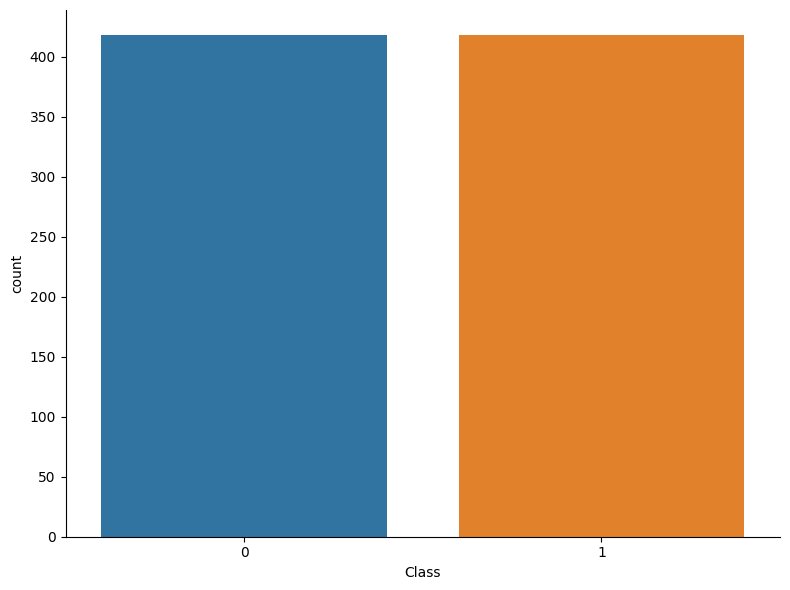

In [ ]:
print(df_normal.Class.value_counts())
print("\n As transações fraudulentas representam {:.3f}% das entradas do dataset. \n".format( (df_normal[df_normal.Class == 1].shape[0] / df_normal.shape[0]) * 100))

#verificando o balanceamento do dataset

fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(x=df_normal['Class'])

#removendo spines da direita e superior
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()

####Matrizes de Correlação

As matrizes de correlaçlão são essenciais para entendermos nossos dados e como eles irão influenciar se uma determinada transação é fraudelenta ou não. Porém é fundamental saber escolher o dataset correto para ter como base a matriz. 

Uma matriz de correlação feita a partir de dados desbalanceados, por exemplo, será altamente afetada pelo desbalanceamento das classes, podendo levar a conclusões errôneas. Por isso, usaremos os dados balanceados para a tomada a análise. 

Em suma, para este dataset podemos tirar as seguintes conclusões:

* **Correlações negativas** - V14, V10, V12 e V9 estão correlacionados negativamente com a classe, ou seja, quanto **menor** estes valores, maior a probabilidade de a transação ser uma fraude. 

* **Correlações positivas** - V4, V2, V11 e V19 estão correlacionados positivamente com a classe, ou seja, quanto **maior** forem estes valores, maior a probabilidade de a transação ser uma fraude. 



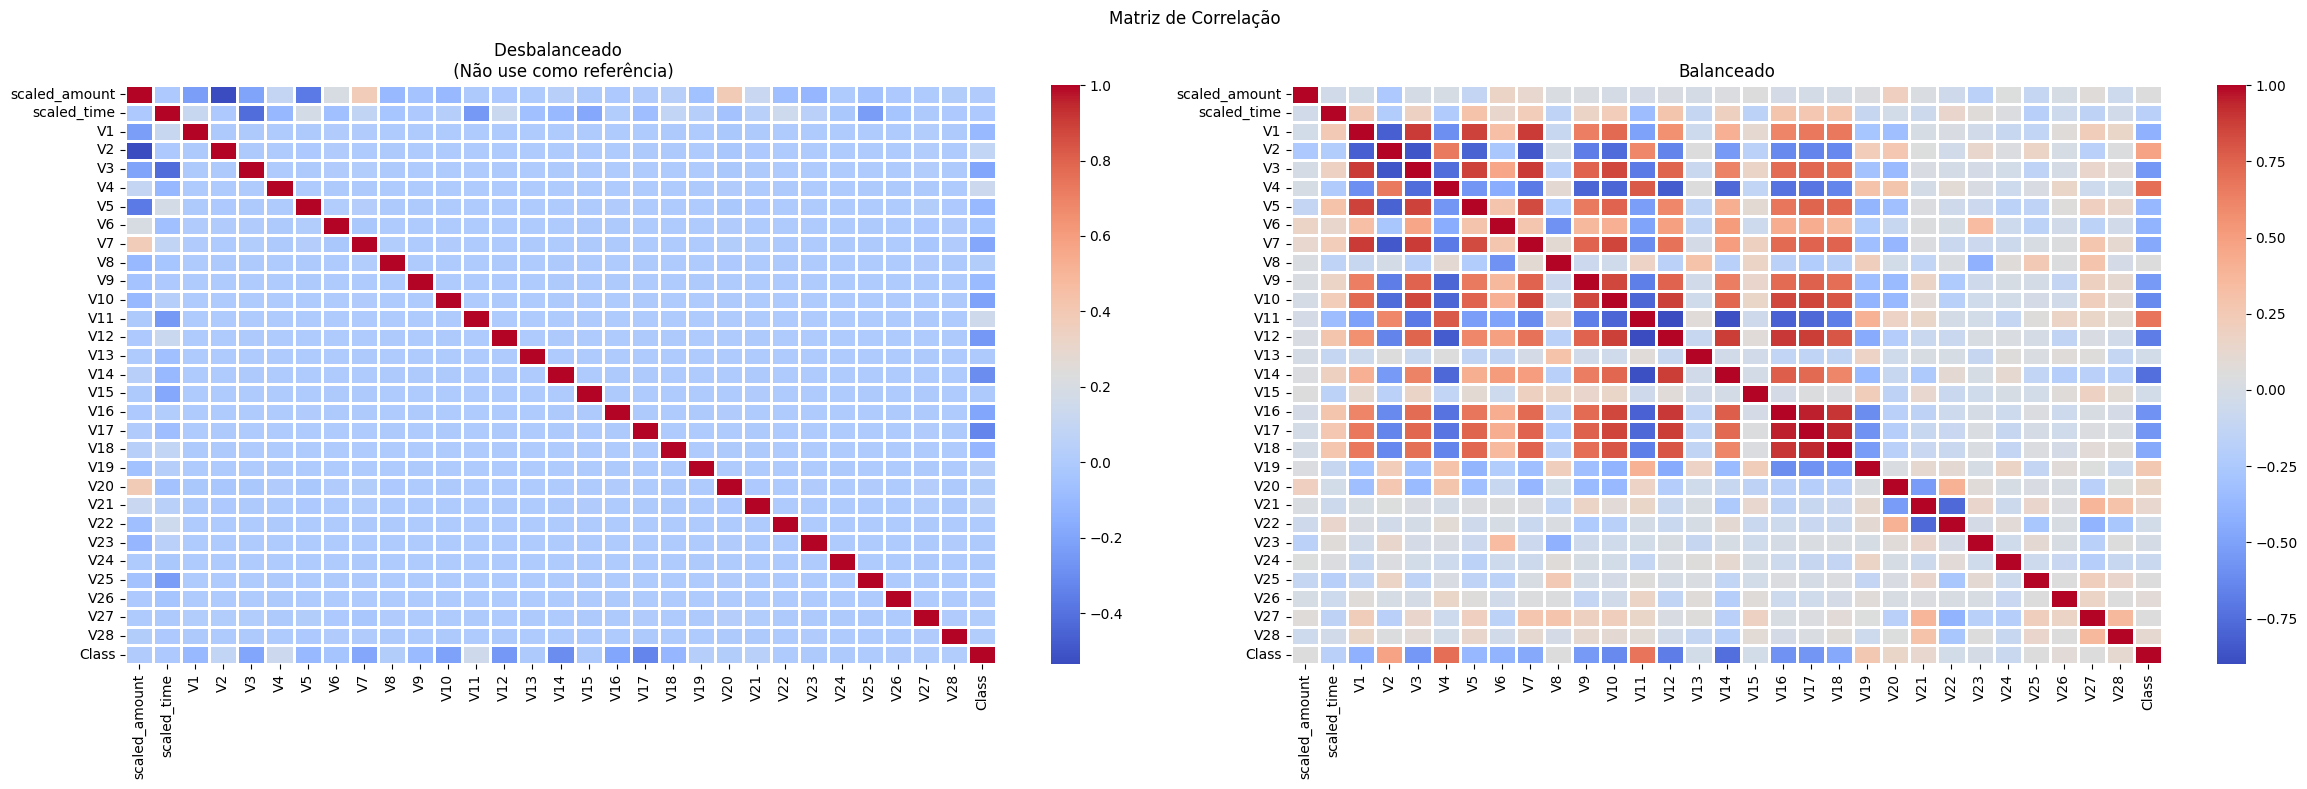

In [ ]:
corr = df.corr()
corr_rus = df_normal.corr()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (24,8))
fig.suptitle('Matriz de Correlação')

#dataset inteiro
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, linewidths=1, cmap ='coolwarm', ax=ax[0])
ax[0].set_title('Desbalanceado \n (Não use como referência)')


#dataset balanceado
sns.heatmap(corr_rus, xticklabels=corr_rus.columns, yticklabels=corr_rus.columns, linewidths=1, cmap ='coolwarm', ax=ax[1])
ax[1].set_title('Balanceado')

plt.tight_layout()

## Modelo de Machine Learning

Após a separação dos dados entre dados de teste, validação e treino, e após realizar o balanceamento do dataset, finalmente iremos instanciar um modelo de machine learning para fazer nossas previsões.

Para isso usaremos o modelo de classifcação baseado em **Regressão logística** e o treinaremos com base nos dados `x_rus` e `y_rus`. Após o treinamento usaremos os dados de teste para testar as previsões do modelo. 

In [ ]:
model = LogisticRegression()
model.fit(x_rus, y_rus)

#fazer previsões com base nos dados de validação

y_pred = model.predict(X_val)
y_proba = model.predict_proba(X_val)

## Avaliar o desempenho do modelo

A avaliação de desempenho de um modelo de machine learning não é algo trivial e precisa ser avaliada caso a caso. 
Para o estudo que temos em mãos, o dataset está originalmente desbalanceado e portanto métricas como a acurácia não serão ideiais para medir desempenho. Relembrando alguns termos:

* **Acurácia**: Nº Total de previsões corretas / Nº total de previsões
* **Verdadeiros Positivos**: Transações Fraudulentas Classificadas Corretamente
* **Falsos Positivo**: Transações Fraudulentas Classificadas Incorretamente
* **Verdadeiros Negativos**: Transações Não Fraudulentas Classificadas Corretamente
* **Falsos Negativos**: Transações Não Fraudulentas Classificadas Incorretamente
* **Precisão**: Verdadeiros Positivos / (Verdadeiros Positivos + Falsos Positivos)
* **Recall**: Verdadeiros Positivos / (Verdadeiros Positivos + Falsos Negativos)

Veja que podemos ter uma acurácia alta ao mesmo tempo que uma performance baixa em detectar transações fraudulentas, pois estas transações são escassas no dataset. 

Para este caso podemos usar a taxa de acertos de transações fraudulentas na matriz de confusão ou o recall do relatório de classificação.

Outra métrica interessante é a **AUC ROC** ou a área sob a curva. Nesta métrica utilizamos a área sobre a curva da taxa de positivos verdadeiros vs a taxa de falsos positivos. Para este modelo temos um AUC de 87%.


Acurácia: 0.9716

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9999    0.9717    0.9856     60417
           1     0.0547    0.9429    0.1033       105

    accuracy                         0.9716     60522
   macro avg     0.5273    0.9573    0.5445     60522
weighted avg     0.9983    0.9716    0.9840     60522

AUC: 0.9573



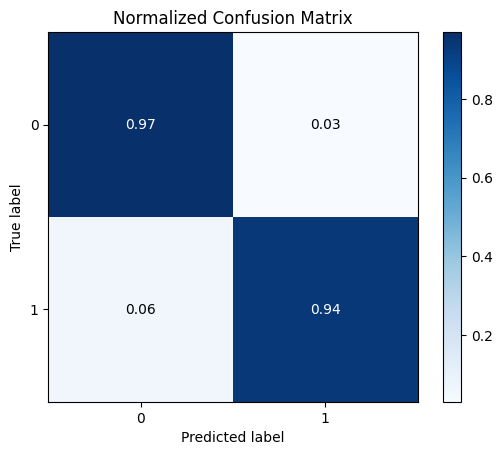

In [ ]:
# plotar a matrix de confusão
skplt.metrics.plot_confusion_matrix(y_val, y_pred,normalize=True)

# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_val, y_pred)))

# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_val, y_pred, digits=4))

# imprimir a área sob da curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_val, y_pred)))

### Fazendo Previsões no Conjunto de Teste

No início do projeto separamos os dados em três conjuntos: Um de treino, um de validação e um de teste.

Como já  exploramos e preparamos os dados, instanciamos e treinamos o modelo de machine learning, é hora de testar o desempenho nos dados de teste. 

De forma simples, apenas utilizaremos o modelo em um outro conjunto de dados. Mas para isso precisamos que os dados estejam no mesmo formato que o modelo espera. 

Para isso, iremos normalizar as variáveis `time`e `Amount`. Neste caso não iremos balancear os dados, pois teríamos uma perda muito grande de informação e o modelo precisa ser capaz de gerar previsões para todas as linhas que lhe forem passadas. 

In [ ]:
# padronizar as colunas Time e Amount - Teste
test_clean = test.copy()

rob_scaler = RobustScaler()
test_clean['scaled_amount'] = rob_scaler.fit_transform(test_clean['Amount'].values.reshape(-1, 1))
test_clean['scaled_time'] = rob_scaler.fit_transform(test_clean['Time'].values.reshape(-1, 1))

test_clean.drop(['Time', 'Amount'], axis=1, inplace=True)

scaled_amount = test_clean['scaled_amount']
scaled_time = test_clean['scaled_time']

test_clean.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
test_clean.insert(0, 'scaled_amount', scaled_amount)
test_clean.insert(1, 'scaled_time', scaled_time)


# ver as primeiras entradas
test_clean.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
183484,0.256891,0.485609,-0.323334,1.057455,-0.048341,-0.607204,1.259821,-0.091761,1.159101,-0.124335,...,0.186409,-0.207098,-0.433890,-0.261613,-0.046651,0.211512,0.008297,0.108494,0.161139,0
255448,-0.283319,0.854959,-0.349718,0.932619,0.142992,-0.657071,1.169784,-0.733369,1.009985,-0.071069,...,-0.096502,-0.271537,-0.833209,-0.030360,0.490035,-0.404816,0.134350,0.076830,0.175562,0
244749,1.052572,0.798947,-1.614711,-2.406570,0.326194,0.665520,2.369268,-1.775367,-1.139049,0.329904,...,0.419835,0.701399,1.134489,0.965054,0.640981,-1.801998,-1.041114,0.286285,0.437322,0
63919,4.064791,-0.394958,-2.477184,0.860613,1.441850,1.051019,-1.856621,2.078384,0.510828,-0.243399,...,-0.987790,0.810408,0.692245,0.150121,-0.260777,0.005183,-0.177847,-0.510060,-0.660533,0
11475,-0.240409,-0.759770,1.338831,-0.547264,0.737389,-0.212383,-1.110039,-0.525744,-0.801403,-0.063672,...,-0.126871,-0.139436,-0.074719,0.067055,0.333122,0.379087,-0.268706,-0.002769,0.003272,0


Agora basta fazer a separação das variáveis em x e y e fazer as previões:

In [ ]:
# separar variáveis entre X e y
X_test = test_clean.drop('Class', axis=1)
y_test = test['Class']



In [ ]:
# fazer as previsões em cima dos dados de teste
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

Utilizaremos as mesmas métricas que usamos anteriormente. 

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9999    0.9723    0.9859     42647
           1     0.0560    0.9459    0.1057        74

    accuracy                         0.9723     42721
   macro avg     0.5279    0.9591    0.5458     42721
weighted avg     0.9983    0.9723    0.9844     42721

Acurácia: 0.9723

AUC: 0.9591



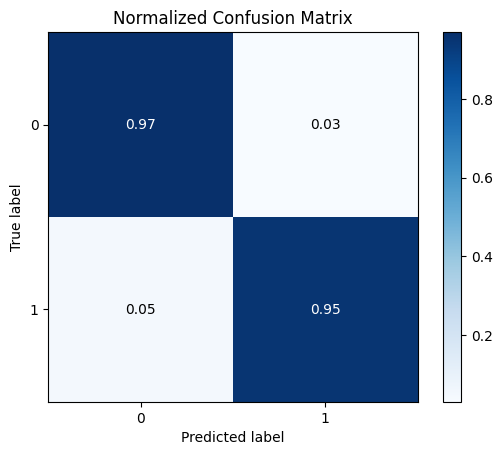

In [ ]:
# plotar a matrix de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)

# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_pred, digits=4))

# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred)))

# imprimir a área sob da curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred)))


Observe que obtemos um resultado muito similar ao utilizar os dados de teste, comparando com os dados de validação. O que é muito bom. 

### Usando um Modelo de Rede Neural

<p align=center>
<img src="https://d1.awsstatic.com/whatisimg/intro-gluon-1%20(1).ac2f31378926b5f99a4ba9d741c4aebe3b7a29e2.png" width="50%"></p>

Nesta seção usaremos um simples modelo de rede neural, para compararmos com o modelo de regressão logística utilizado anteriormente. 

Utilizaremos a biblioteca `scikit-learn`novamente, utilizando a classe `MLPClassifier`, que instância um modelo de rede neural específico para casos de classificação. 

Utilizaremos os mesmos dados que usamos para a regressão logística. Começaremos já instanciando o modelo de rede neural, onde:

* **hidden_layer_sizes**: Este parâmetro nos permite definir o número de camadas e o número de nós que desejamos ter no classificador de rede neural NLPClassifier. Cada elemento na tupla representa o número de nós na posição i, onde i é o índice da tupla. Assim, o comprimento da tupla denota o número total de camadas ocultas na rede.
* **max_iter**: Denota o número de épocas.
* **activation**: A função de ativação para as camadas ocultas.
* **solver**: Este parâmetro especifica o algoritmo para otimização de peso entre os nós.
* **random_state**: O parâmetro permite definir uma *seed* para reproduzir os mesmos resultados.

In [ ]:
#importando o modelo do scikit-learn
from sklearn.neural_network import MLPClassifier

#inicializando o modelo

modelo = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=300, activation = 'relu',solver='lbfgs',random_state=1)

Após isso, iremos treinar nossa rede neural com os mesmos dados que usamos para treinar o método anterior:

In [ ]:
modelo.fit(x_rus, y_rus);

Agora usaremos o modelo treinado para prever os resultados e calcular as métricas.

Acurácia: 0.9470

Relatório de Classificação:
               precision    recall  f1-score   support

           0     1.0000    0.9469    0.9727     60417
           1     0.0317    1.0000    0.0614       105

    accuracy                         0.9470     60522
   macro avg     0.5158    0.9734    0.5171     60522
weighted avg     0.9983    0.9470    0.9711     60522

AUC: 0.9734



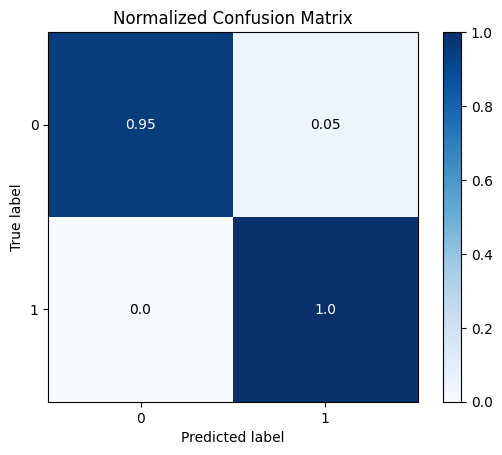

In [ ]:
#fazer previsões com base nos dados de validação

y_nn_pred = modelo.predict(X_val)
y_nn_proba = modelo.predict_proba(X_val)

#calculando as métricas e a matriz de confusão

# plotar a matrix de confusão
skplt.metrics.plot_confusion_matrix(y_val, y_nn_pred,normalize=True)

# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_val, y_nn_pred)))

# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_val, y_nn_pred, digits=4))

# imprimir a área sob da curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_val, y_nn_pred)))


Agora, usaremos os dados de teste, da mesma forma que fizemos anteriormente com o modelo de regressão logística.

Acurácia: 0.9494

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9999    0.9494    0.9740     42647
           1     0.0314    0.9459    0.0608        74

    accuracy                         0.9494     42721
   macro avg     0.5157    0.9477    0.5174     42721
weighted avg     0.9982    0.9494    0.9724     42721

AUC: 0.9477



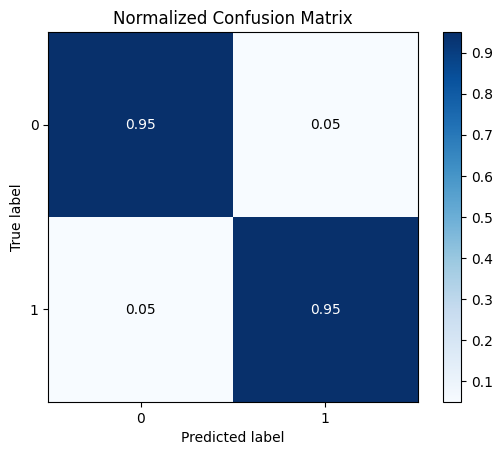

In [ ]:
#fazer previsões com base nos dados de teste
y_nn_pred = modelo.predict(X_test)
y_nn_proba = modelo.predict_proba(X_test)

#calculando as métricas e a matriz de confusão

# plotar a matrix de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_nn_pred,normalize=True)

# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_nn_pred)))

# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_nn_pred, digits=4))

# imprimir a área sob da curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_nn_pred)))

Podemos observar que para os dados de validação o modelo de rede neural obteve resultados muito satisfatórios, chegando a um total de zero falsos negativo, porém nos dados de teste ele mostrou um desempenho semelhante a regressão logística. 

## Conclusão

  A detecção de fraudes em cartões de crédito não é um problema trivial. Podemos ver através deste trabalho que diferentes conceitos e ferramentas são utilizadas.

  Os dados utilizados neste estudo foram transformados utilizando PCA (Principal Component Analysis) e em grande parte tiveram sua natureza mantida em segredo. Porém com uma análise exploratória dos dados é possível identificar padrões na distribuição das variáveis e assim conhecer os dados antes de iniciar as previsões.

  Devido a natureza desbalanceada do dataset, utilizamos o método de under-sampling para contornar este problema antes de instanciarmos o modelo de machine learning. Este passo é fundamental para uma análise correta e não deve ser pulado. Lemnbrando que esta é apenas uma das técnicas disponíveis para resolver este tipo de problema. 

  Por fim, utlizamos os métodos de regressão logística e uma rede neural simples para fazermos nossas previsões. Obtivemos resultados semelhantes em ambos os casos, sendo que a rede neural performou um pouco melhor nos dados de validação, mas manteve uma performance similar a regressão logística nos dados de teste.

  Apesar do bom resultado, ambos os modelos podem ser melhorados otimizando seus parâmetros. Há também espaço para a utilização de outros modelos de classificação, como Naive-Bayes, Random Forest, entre outros. 
  